In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
import os
import glob

In [2]:
lst_tsv = glob.glob("../visibility_minority/tsv_v_m/*")

mapping_values = {}

for fn in lst_tsv:
    
    df_visibility = pd.read_csv(fn, sep="\t", header=None, index_col=0)
    
    networkname = fn[:-4].split("/")[-1]
    
    for ix_method in df_visibility.index:
    
        methodname = ix_method.split("_")[-1]
    
        if methodname not in mapping_values:

            mapping_values[methodname] = {}

        mapping_values[methodname][networkname] = df_visibility.loc[ix_method].values

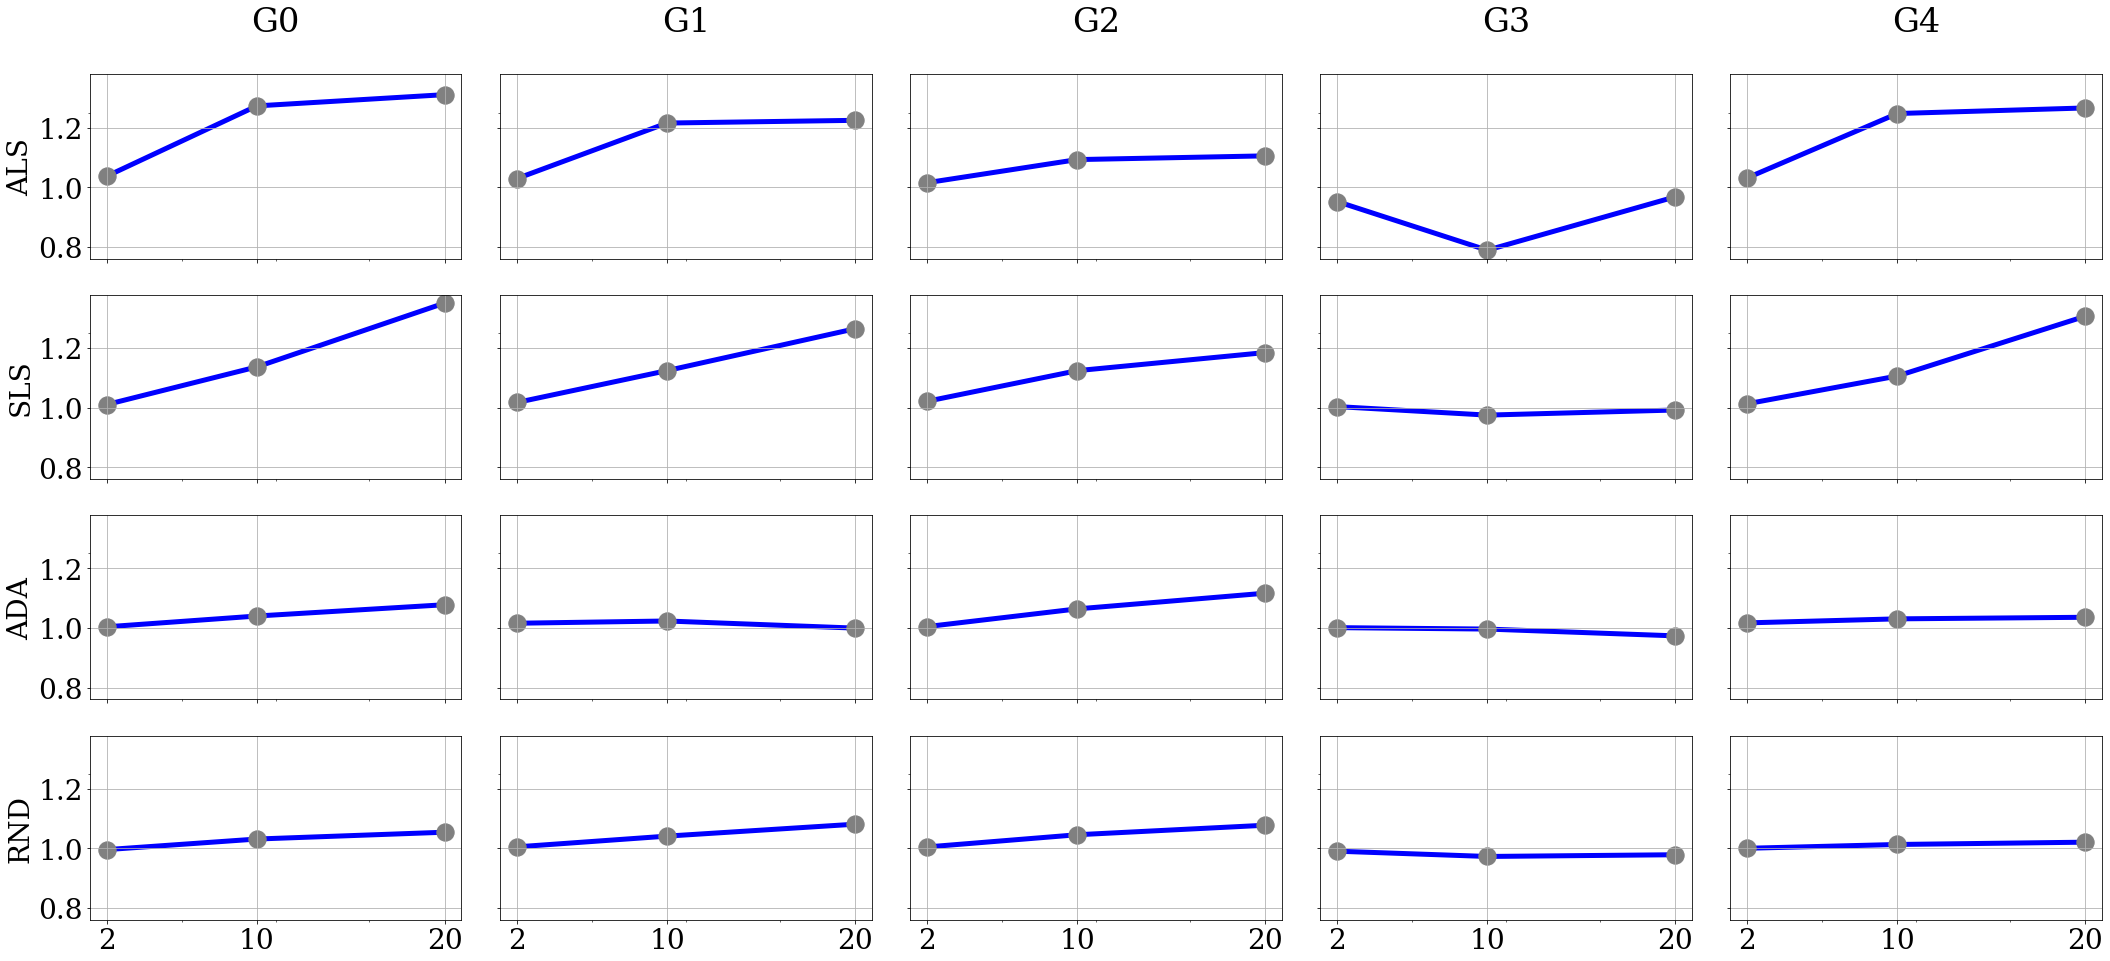

In [26]:
fontsize = 28

from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = fontsize

labels_methods = dict(zip(['als', 'salsa', 'ada', 'random'], ['ALS', 'SLS', 'ADA', 'RND']))


fig, ax = plt.subplots(4,5, sharex=True, sharey=True, figsize=(30,14))


checktitle = False

for nx, method in enumerate(["als", "salsa", "ada", "random"]):
    
    

    df_one_method = pd.DataFrame.from_dict(mapping_values[method]).T
    
    
    for ny, ix in enumerate(sorted(df_one_method.index)):
        
        
        
        
        if checktitle == True:

            title = ""
        else:
            title=ix.replace("N", "G") + "\n"
        
        one_vec = (1+df_one_method.loc[ix].pct_change().cumsum())[[1,9,19]]    
        one_vec.plot(
            #figsize=(8,4), 
            #ylim=(-0.05,0.15),
            ax = ax[nx][ny],
            #marker="o",
            title=title,
            color="blue",
            grid=True,
            zorder=0,
            linewidth = 5,
            
            
            )
        ax[nx][ny].set_ylabel(labels_methods[method], fontsize=fontsize)
        
        #if ix != "N0":
            #ax[nx][ny].set_yticklabels([])
            
        ax[nx][ny].scatter(x = one_vec.index, y=one_vec.values, color="grey", zorder=1, s=300)
        ax[nx][ny].set_xticks([1,9,19])
        ax[nx][ny].set_xticklabels(x=[1,9,19], labels=[2,10,20])
        
        ax[nx][ny].set_yticks([0.8,1,1.2])
        #ax[nx][ny].set_xticklabels(x=[1,9,19], labels=[2,10,20])

    checktitle = True
    
plt.tight_layout()


plt.savefig("growth-rate.pdf", format="pdf")